In [77]:
%matplotlib inline
import os
import hugs
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('jpg')

from toolbox.cosmo import Cosmology
cosmo = Cosmology()

In [2]:
path = os.path.join(os.environ.get('HUGS_PIPE_IO'), 'patches-run-20170208-223945')
butler = hugs.datasets.CatButler(path)
out_fn = os.path.join(path, 'patch-combined-cat.csv')

In [84]:
if False:
    cat = butler.combine_patch_cats()
    cat.to_csv(out_fn, index=False)
else:
    cat = pd.read_csv(out_fn)
cat['g-i'] = cat['mu_aper_0(g)'] - cat['mu_aper_0(i)']
cat['g-r'] = cat['mu_aper_0(g)'] - cat['mu_aper_0(r)']

In [85]:
m, b = 0.6724944691862157, -0.3313339303786671
color_line = lambda _x: m*_x + b

In [98]:
cut = cat['mu_0(g)'] > 24.0
cut &= cat['r_e(i)'] < 100
cut &= cat['r_e(i)'] > 3.0
cut &= np.abs(cat['r_e(i)']-cat['r_e(g)'])<1.0
cut &= np.abs(cat['dr_e(i)']) < 1.0
cut &= np.abs(cat['dmu(i)']) < 1.0
cut &= np.abs(cat['dmu(g)']) < 1.0
cut &= np.abs(cat['dR0']) < 15
cut &= cat['n'] > 0.01
cut &= cat['ell']<0.65

color_cut = (cat['g-r'] > color_line(cat['g-i']))
color_cut &= cat['g-i'] < 1.9

cut &= color_cut

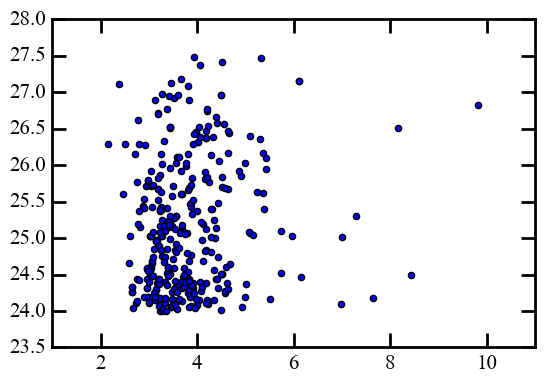

In [99]:
plt.scatter(cat[cut]['r_e(g)'], cat[cut]['mu_0(g)']);

In [100]:
sample = cat[cut].copy()
hugs.datasets.hugged.remove_duplicates(sample)

In [103]:
len(sample)

268

In [104]:
sample.to_csv('/Volumes/tigress/hugs-pipe-io/viz-inspect-results/sample-aggresive-cuts.csv')

(0, 2)

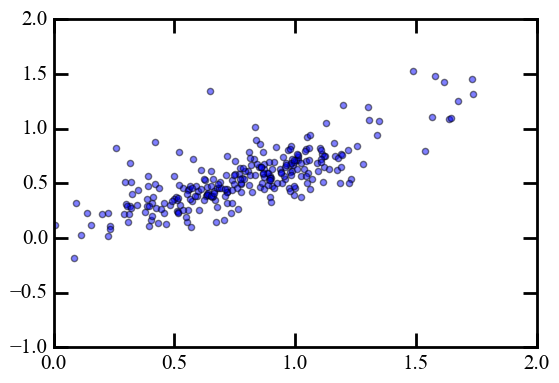

In [102]:
plt.scatter(sample['g-i'], sample['g-r'], alpha=0.5)
plt.xlim(0,2)

In [105]:
oldcat = pd.read_csv('/Users/protostar/local_data/hsc/stamps/candy/20170130-143629/candy.csv')